In [9]:
import pandas as pd
import numpy as np

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB, CategoricalNB, MultinomialNB, BernoulliNB

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
df = pd.read_csv('../assests/scaled_voice_data.csv')

In [22]:
df.head()

,meanfreq,sd,median,Q25,Q75,kurt,sp.ent,sfm,mode,meanfun,minfun,modindx,gender
0,-1.017139,2.012536,0.155201,-1.784546,0.116305,-0.230102,1.407711,1.638474,0.699608,1.235429,0.317097,0.185051,female
1,-0.242956,1.167716,0.209318,-0.236093,0.295384,-0.244366,1.617131,1.963082,0.471396,0.061898,-1.072361,0.505507,female
2,0.594624,-0.628856,0.383436,0.459674,0.778532,-0.223221,0.329348,-1.721108,-0.005193,0.131058,0.996114,-0.042381,male
3,0.410492,-1.411220,0.306990,0.786895,-0.472162,-0.225505,-1.279564,-1.029810,0.466451,1.474043,3.100587,0.767026,female
4,0.804964,-1.414826,0.709370,0.811088,0.051118,-0.234219,-0.741627,-1.293786,0.707130,0.488538,0.692233,-0.538644,female


In [28]:
class NavieBayesianModels:

    def Gaussian_Naive_Bayes(x_train, y_train, x_test, y_test, i, k, display_stats=False):
        NB_model = GaussianNB()
        NB_model.fit(x_train,y_train)
        y_pred = NB_model.predict(x_test)

        # Accuracy, Precision, Recall, F1-score of Model
        accuracy = metrics.accuracy_score(y_test, y_pred)
        precision = metrics.precision_score(y_test, y_pred, average='weighted')
        recall = metrics.recall_score(y_test, y_pred, average='weighted')
        f1_score = metrics.f1_score(y_test, y_pred, average='weighted')

        if display_stats:
            print(f"Statistics for Fold {i} in K-fold (k={k}) 'Logistic Regression' algorithm")
            print(f"Accuracy: {accuracy}")
            print(f"Precision: {precision}")
            print(f"Recall: {recall}")
            print(f"F1-score: {f1_score}")
            print()
            
        return np.array([accuracy, precision, recall, f1_score])


    def Bernoulli_Naive_Bayes(x_train, y_train, x_test, y_test, i, k, display_stats=False):
        NB_model = BernoulliNB()
        NB_model.fit(x_train,y_train)
        y_pred = NB_model.predict(x_test)

        # Accuracy, Precision, Recall, F1-score of Model
        accuracy = metrics.accuracy_score(y_test, y_pred)
        precision = metrics.precision_score(y_test, y_pred, average='weighted')
        recall = metrics.recall_score(y_test, y_pred, average='weighted')
        f1_score = metrics.f1_score(y_test, y_pred, average='weighted')

        if display_stats:
            print(f"Statistics for Fold {i} in K-fold (k={k}) 'Logistic Regression' algorithm")
            print(f"Accuracy: {accuracy}")
            print(f"Precision: {precision}")
            print(f"Recall: {recall}")
            print(f"F1-score: {f1_score}")
            print()
            
        return np.array([accuracy, precision, recall, f1_score])

    # def __init__(self):
    #     if(model=="Gaussian"):
    #         Gaussian_Naive_Bayes()
    #     else if(model=="CategoricalNB"):
            

In [33]:
def RunModel():
    x = df.drop('gender', axis=1)
    y = df['gender']

    k = 10
    i = 0
    k_fold = KFold(n_splits=k)

    # Holds Mean of {accuracy, precision, recall, f1_score}
    mean_stats = np.zeros(4)

    for train_index, test_index in k_fold.split(x):
        x_train, x_test = x.loc[train_index], x.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]
        
        stats = NavieBayesianModels.Gaussian_Naive_Bayes(x_train, y_train, x_test, y_test, i:=i+1, k, display_stats=False)
        mean_stats = mean_stats + stats
        
    # Take mean of {accuracy, precision, recall, f1_score}
    mean_stats = mean_stats / k

    print(f"Mean accuracy: {mean_stats[0]}")
    print(f"Mean Precision: {mean_stats[1]}")
    print(f"Mean Recall: {mean_stats[2]}")
    print(f"Mean F1-score: {mean_stats[3]}")

RunModel()

Mean accuracy: 0.899944096154614
Mean Precision: 0.901324193932329
Mean Recall: 0.899944096154614
Mean F1-score: 0.8998483155418237


# ROC Curve for GaussianNB

In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [20]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
# Removing Unnecessary warnings
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [21]:
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('../assests/scaled_voice_data.csv')
x = df.drop('gender', axis=1)
y = df['gender']
le = LabelEncoder()
Y_encoded = le.fit_transform(y)

In [23]:
xtrain_roc,xtest_roc, ytrain_roc, ytest_roc = train_test_split(np.array(x), np.array(Y_encoded), test_size=0.2)
model_roc  =  GaussianNB()
model_roc.fit(xtrain_roc, ytrain_roc)
Y_predict_roc = model_roc.predict_proba(xtest_roc)

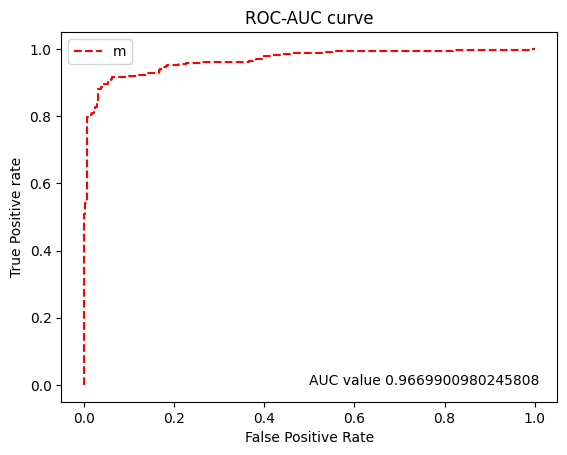

 Cass: male


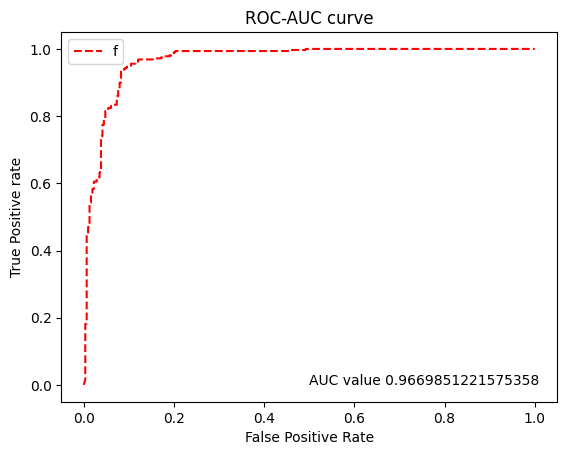

 Cass: female


In [24]:

def roc_auc(y_roc):
    lisrt=['male','female']
    for m in range(2):
        ls=[]
        for j in ytest_roc:
            if m==j:
                ls.append(1)
            else:
                ls.append(0)

        fpr, tpr, thresh =  metrics.roc_curve(ls,Y_predict_roc[:,m])
        auc = metrics.roc_auc_score(ls,Y_predict_roc[:,m])
        #plt.subplot(1,1,m)
        plt.plot(fpr, tpr,  label="AUC = " +str(auc), linestyle='--',color='red')
        plt.title('ROC-AUC curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive rate')
        plt.legend(lisrt[m])
        plt.text(0.5,0.0, 'AUC value ' + str(auc))
        # plt.savefig('ROC',dpi=300)
        plt.show()
        print(" Cass: " + lisrt[m])

roc_auc(Y_predict_roc)

# ROC curve for LR

In [25]:
from sklearn.linear_model import LogisticRegression 

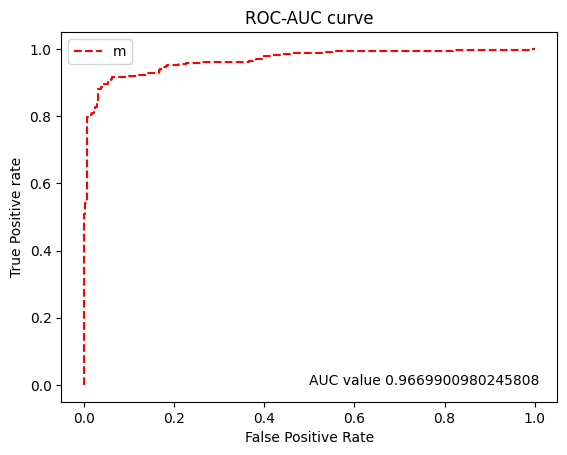

 Cass: male


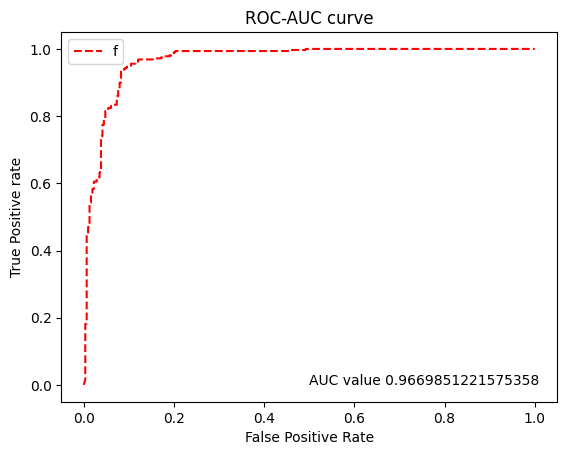

 Cass: female


In [26]:
log_reg_model = LogisticRegression(penalty='l2', max_iter=500)
log_reg_model.fit(xtrain_roc, ytrain_roc)
y_pred =lr_pca.predict(xtest_roc)
roc_auc(y_pred)

# TSNE of given Data

In [27]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [29]:
import seaborn as sb

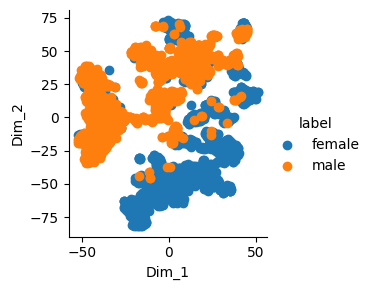

In [30]:
model = TSNE(n_components=2, random_state=0)

tsne_data = model.fit_transform(x)
y = df['gender']
tsne_data = np.vstack((tsne_data.T, y)).T
tsne_df = pd.DataFrame(data=tsne_data, c=("Dim_1", "Dim_2", "label"))# creating a new 
sb.FacetGrid(tsne_df, hue="label").map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

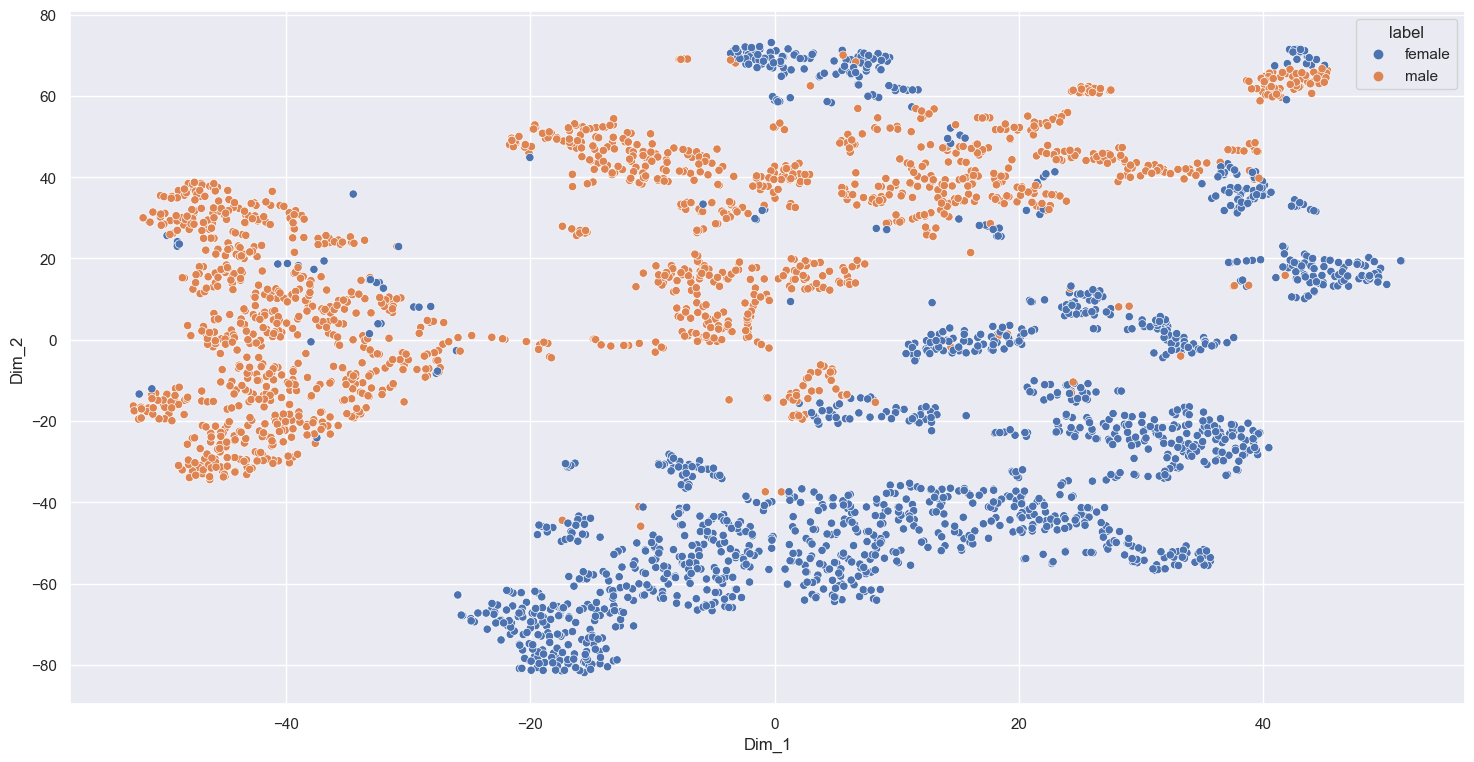

In [51]:
plt.figure(figsize=(18,9))
sb.scatterplot(x="Dim_1", y="Dim_2",hue="label",data=tsne_df);

# PCA for Logistic Regression Model

In [16]:
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [19]:
df = pd.read_csv('../assests/scaled_voice_data.csv')
x = df.drop('gender', axis=1)
y = df['gender']

In [20]:
for i in range(4,13,2):
    pca = PCA(n_components=i)
    pca.fit(x)
    pca_df = pca.transform(x)
    
    L = []

    for k in range(1, len(pca_df[0])+1):
        L.append("PCA"+str(k))
    pca_df = pd.DataFrame(pca_df, c=L)
    
    X_trainpca, X_testpca , Y_trainpca, Y_testpca = train_test_split(pca_df, y, test_size=0.2, random_state=20)

    lr_pca = LogisticRegression(penalty='l2', max_iter=500)
    lr_pca.fit(X_trainpca, Y_trainpca)
    y_pca_pred =lr_pca.predict(X_testpca)

    print()
    print("Number of Components: " + str(i))
    print(f"GaussianNB with PCA variance {i/100}%")
    print("Accuracy with PCA", metrics.accuracy_score(Y_testpca, y_pca_pred))
    print("Precision with PCA", metrics.precision_score(Y_testpca, y_pca_pred, average = 'macro'))
    print("Recall with PCA", metrics.recall_score(Y_testpca, y_pca_pred, average = 'macro'))
    print("F1 score with PCA", metrics.f1_score(Y_testpca, y_pca_pred, average = 'macro') )


Number of Components: 4
GaussianNB with PCA variance 0.04%
Accuracy with PCA 0.8422712933753943
Precision with PCA 0.8503306577818164
Recall with PCA 0.8461784043179392
F1 score with PCA 0.8420811413996493

Number of Components: 6
GaussianNB with PCA variance 0.06%
Accuracy with PCA 0.9637223974763407
Precision with PCA 0.963379411999044
Recall with PCA 0.964188440932627
F1 score with PCA 0.963665901712053

Number of Components: 8
GaussianNB with PCA variance 0.08%
Accuracy with PCA 0.9700315457413249
Precision with PCA 0.969721425155428
Recall with PCA 0.9703540750052377
F1 score with PCA 0.9699770952602891

Number of Components: 10
GaussianNB with PCA variance 0.1%
Accuracy with PCA 0.9684542586750788
Precision with PCA 0.9681239976491448
Recall with PCA 0.9688525735037363
F1 score with PCA 0.9684011164274322

Number of Components: 12
GaussianNB with PCA variance 0.12%
Accuracy with PCA 0.9684542586750788
Precision with PCA 0.9681239976491448
Recall with PCA 0.9688525735037363
F1 sc

# Decision Tree Model

In [13]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [21]:
df = pd.read_csv('../assests/scaled_voice_data.csv')
x = df.drop('gender', axis=1)
y = df['gender']
le = LabelEncoder()
Y_encoded = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(x, Y_encoded, test_size = 0.2, random_state = 100)

Decision Tree with gini criterion

In [26]:
depth = [4,8,10,15,20]
for i in depth:
    DT = DecisionTreeClassifier(criterion = "gini", max_depth = i)
    DT.fit(X_train, y_train)
    y_pred =DT.predict(X_test)
    # Model Accuracy
    print("Accuracy with tree depth {} is:".format(i),metrics.accuracy_score(y_test, y_pred))
    print("Precision with tree depth {} is:".format(i),metrics.precision_score(y_test, y_pred))
    print("Recall with tree depth {} is:".format(i),metrics.recall_score(y_test, y_pred))
    print("F1 Score with tree depth {} is:".format(i),metrics.f1_score(y_test, y_pred))
    print("\n")



Accuracy with tree depth 4 is: 0.9637223974763407
Precision with tree depth 4 is: 0.9498432601880877
Recall with tree depth 4 is: 0.9774193548387097
F1 Score with tree depth 4 is: 0.9634340222575517


Accuracy with tree depth 8 is: 0.9716088328075709
Precision with tree depth 8 is: 0.953416149068323
Recall with tree depth 8 is: 0.9903225806451613
F1 Score with tree depth 8 is: 0.9715189873417721


Accuracy with tree depth 10 is: 0.9605678233438486
Precision with tree depth 10 is: 0.9467084639498433
Recall with tree depth 10 is: 0.9741935483870968
F1 Score with tree depth 10 is: 0.9602543720190778


Accuracy with tree depth 15 is: 0.9574132492113565
Precision with tree depth 15 is: 0.9463722397476341
Recall with tree depth 15 is: 0.967741935483871
F1 Score with tree depth 15 is: 0.9569377990430622


Accuracy with tree depth 20 is: 0.9637223974763407
Precision with tree depth 20 is: 0.9498432601880877
Recall with tree depth 20 is: 0.9774193548387097
F1 Score with tree depth 20 is: 0.9634

Decision Tree with Entropy

Making Tree fro maxdepth = 4

Accuracy with tree depth 4 is: 0.9668769716088328
Precision with tree depth 4 is: 0.9616613418530351
Recall with tree depth 4 is: 0.9709677419354839
F1 Score with tree depth 4 is: 0.9662921348314607


Accuracy with tree depth 8 is: 0.9668769716088328
Precision with tree depth 8 is: 0.9616613418530351
Recall with tree depth 8 is: 0.9709677419354839
F1 Score with tree depth 8 is: 0.9662921348314607


Accuracy with tree depth 10 is: 0.9637223974763407
Precision with tree depth 10 is: 0.9555555555555556
Recall with tree depth 10 is: 0.9709677419354839
F1 Score with tree depth 10 is: 0.9632000000000002


Accuracy with tree depth 15 is: 0.9637223974763407
Precision with tree depth 15 is: 0.9555555555555556
Recall with tree depth 15 is: 0.9709677419354839
F1 Score with tree depth 15 is: 0.9632000000000002


Accuracy with tree depth 20 is: 0.9637223974763407
Precision with tree depth 20 is: 0.9526813880126183
Recall with tree depth 20 is: 0.9741935483870968
F1 Score with tree depth 20 is: 0.96

[Text(0.5446428571428571, 0.9, 'X[9] <= -0.031\nentropy = 1.0\nsamples = 2534\nvalue = [1260, 1274]'),
 Text(0.2857142857142857, 0.7, 'X[9] <= -0.27\nentropy = 0.306\nsamples = 1298\nvalue = [71, 1227]'),
 Text(0.14285714285714285, 0.5, 'X[3] <= 0.358\nentropy = 0.138\nsamples = 1136\nvalue = [22, 1114]'),
 Text(0.07142857142857142, 0.3, 'X[10] <= -0.911\nentropy = 0.081\nsamples = 1092\nvalue = [11, 1081]'),
 Text(0.03571428571428571, 0.1, 'entropy = 0.183\nsamples = 395\nvalue = [11, 384]'),
 Text(0.10714285714285714, 0.1, 'entropy = 0.0\nsamples = 697\nvalue = [0, 697]'),
 Text(0.21428571428571427, 0.3, 'X[9] <= -0.448\nentropy = 0.811\nsamples = 44\nvalue = [11, 33]'),
 Text(0.17857142857142858, 0.1, 'entropy = 0.201\nsamples = 32\nvalue = [1, 31]'),
 Text(0.25, 0.1, 'entropy = 0.65\nsamples = 12\nvalue = [10, 2]'),
 Text(0.42857142857142855, 0.5, 'X[4] <= -0.045\nentropy = 0.884\nsamples = 162\nvalue = [49, 113]'),
 Text(0.35714285714285715, 0.3, 'X[5] <= -0.231\nentropy = 0.629\n

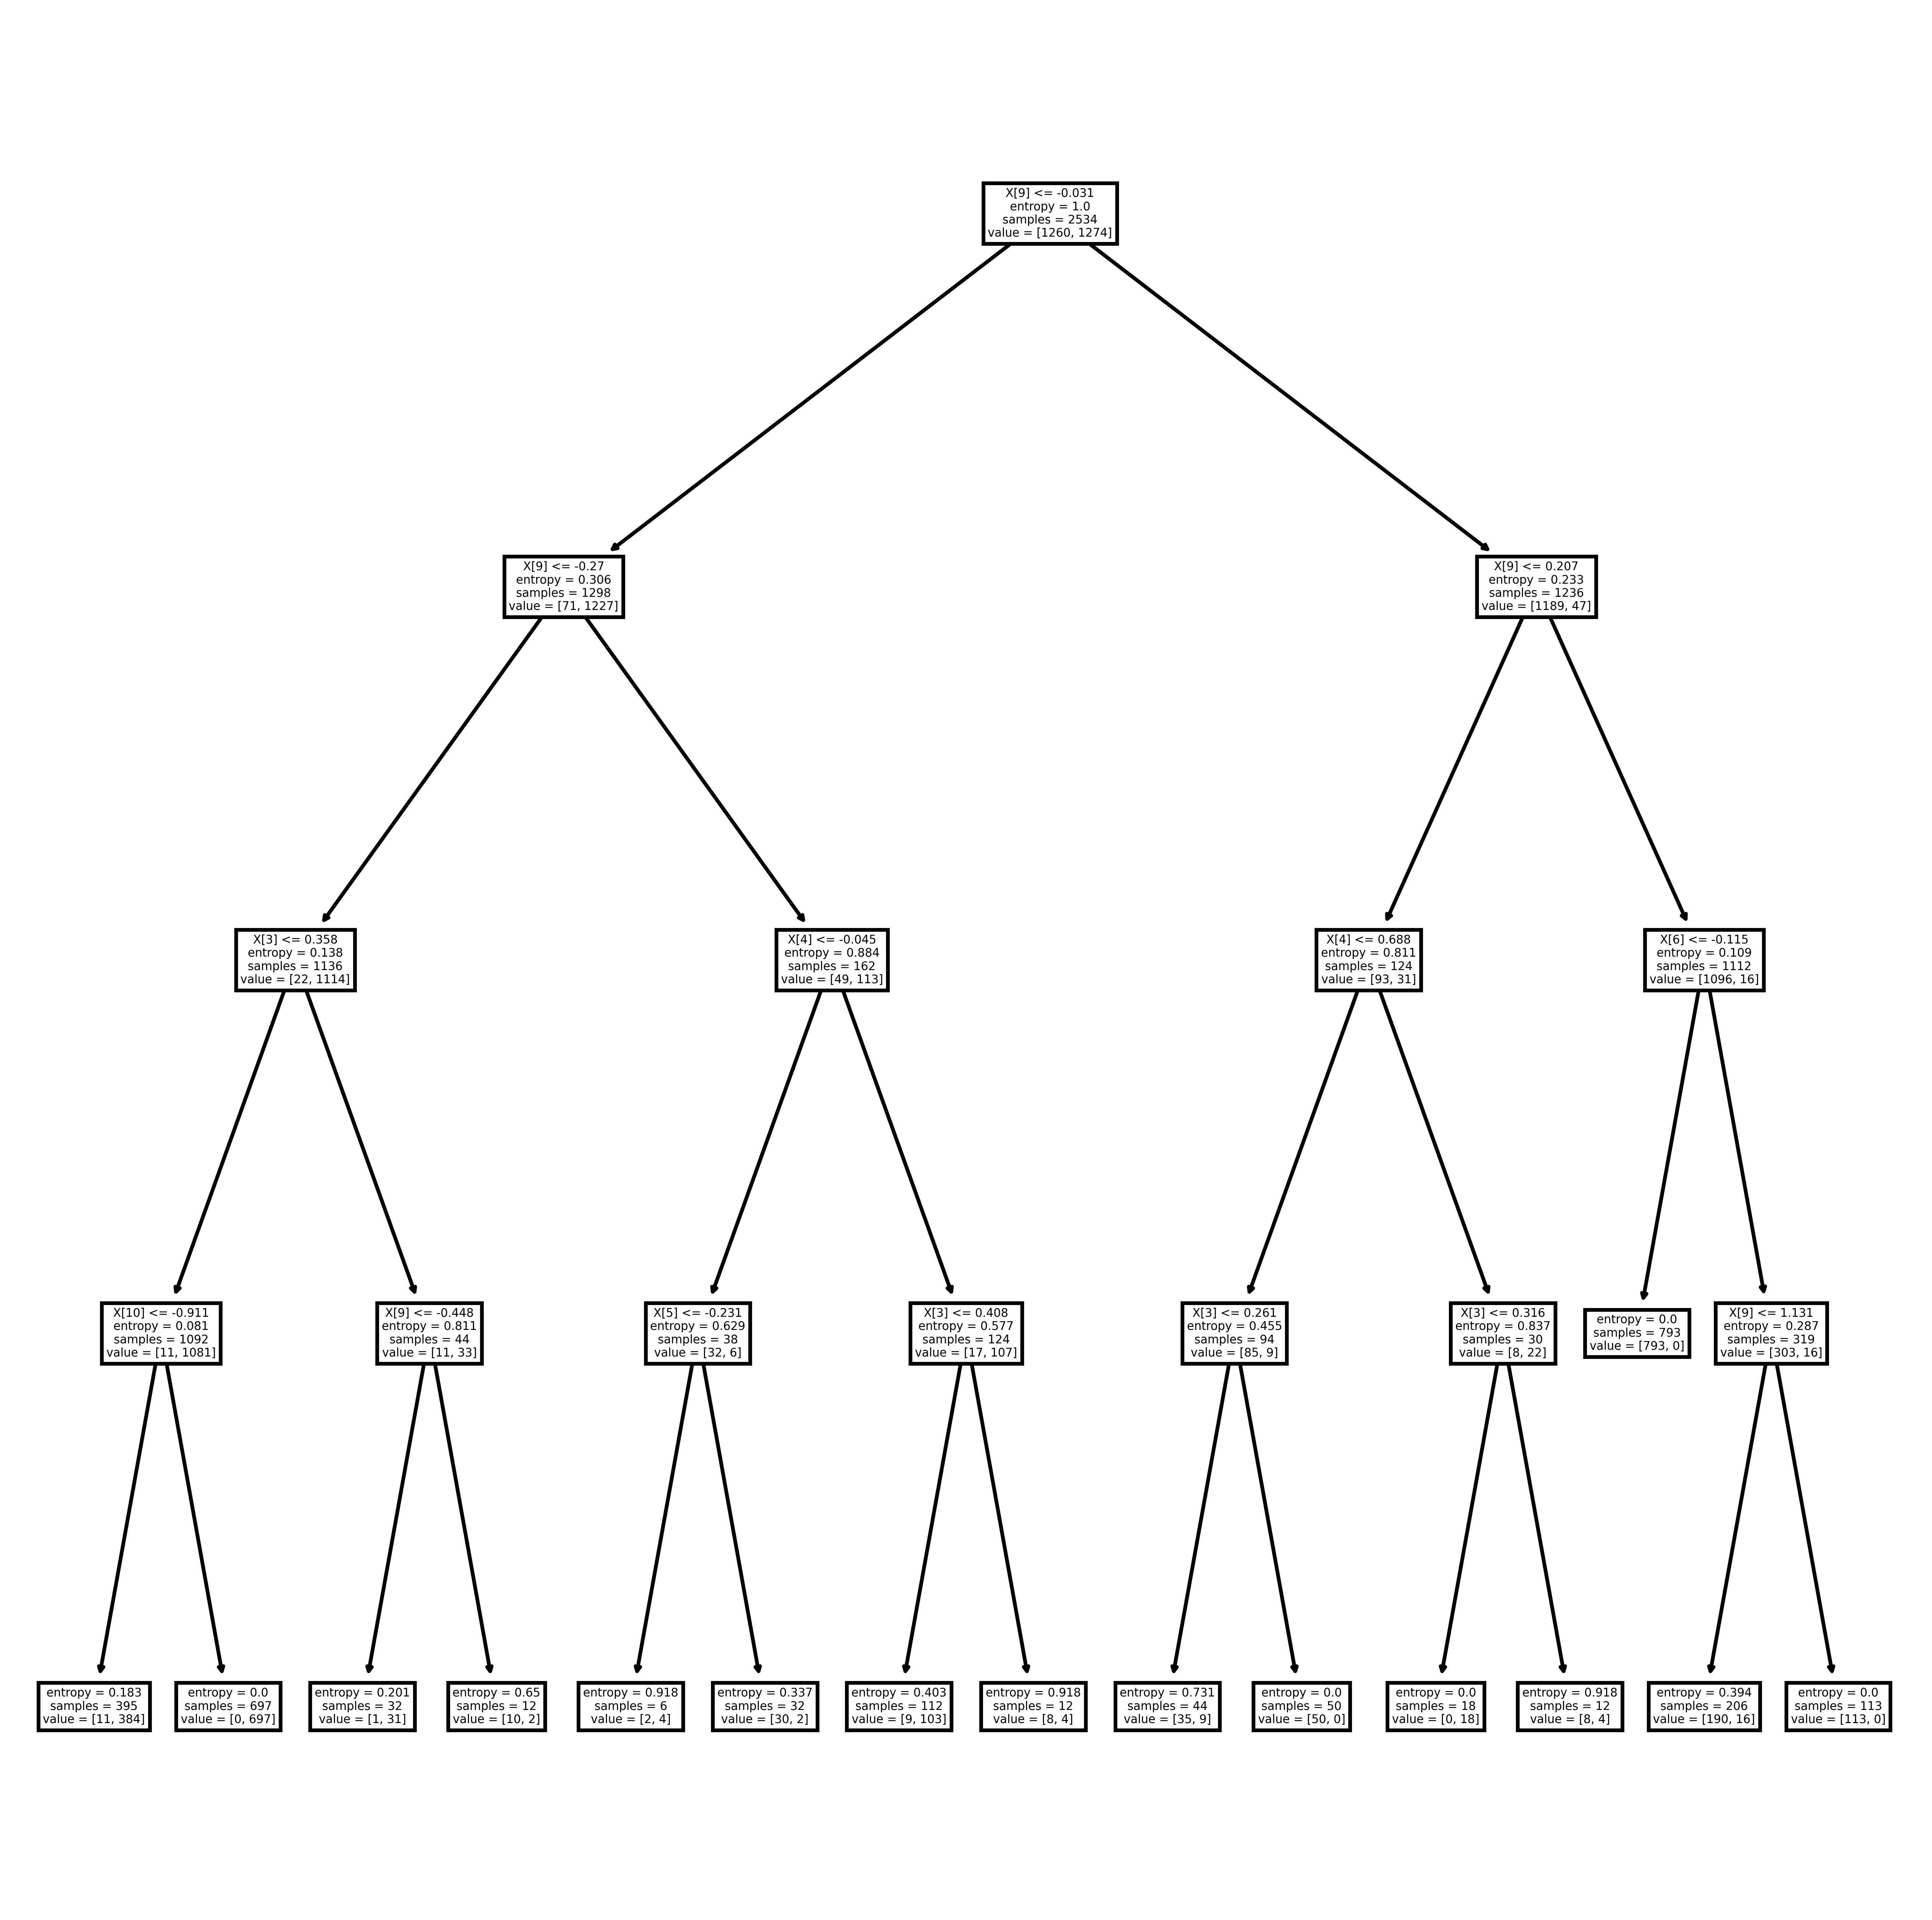

In [30]:
from sklearn import tree
import matplotlib.pyplot as plt
depth = [4,8,10,15,20]
for i in depth:
    DT = DecisionTreeClassifier(criterion = "entropy", max_depth = i)
    DT.fit(X_train, y_train)
    y_pred =DT.predict(X_test)
    # Model Accuracy
    print("Accuracy with tree depth {} is:".format(i),metrics.accuracy_score(y_test, y_pred))
    print("Precision with tree depth {} is:".format(i),metrics.precision_score(y_test, y_pred))
    print("Recall with tree depth {} is:".format(i),metrics.recall_score(y_test, y_pred))
    print("F1 Score with tree depth {} is:".format(i),metrics.f1_score(y_test, y_pred))
    print("\n")
fig, axes = plt.subplots(nr = 1,ncols = 1,figsize = (9,9), dpi=800)
newDT = DecisionTreeClassifier(criterion = "entropy", max_depth = 4)
newDT.fit(X_train, y_train)
tree.plot_tree(newDT)

In [ ]:
# 1) Sobel's Filter Technique
#sobel kernel

sx = np.array([[-1 , 0], 
                    [0 , 1]])
sy = np.array([[0,-1], 
                    [1,0]])
[r, c] = np.shape(image2)
output_image = np.zeros(shape=(r, c))
sfx = np.zeros(shape=(r, c))
sfy = np.zeros(shape=(r, c))

for l in range(r - 2):
    for j in range(c - 2):
        gx = np.sum(np.multiply(sx, image2[l:l + 2, j:j + 2])) 
        sfx[l+1,j+1]=gx                                        
        gy = np.sum(np.multiply(sy, image2[l:l + 2, j:j + 2]))     
        sfy[l+1,j+1]=gy                                       
        output_image[l + 1, j + 1] = np.sqrt(gx ** 2 + gy ** 2) 
plt.imshow(output_image, cmap=plt.get_cmap('gray'))
plt.show() 